# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
ais = pd.read_csv('../data/ais.csv')


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      202 non-null    int64   
 1   rcc     202 non-null    float64 
 2   wcc     202 non-null    float64 
 3   hc      202 non-null    float64 
 4   hg      202 non-null    float64 
 5   ferr    202 non-null    int64   
 6   bmi     202 non-null    float64 
 7   ssf     202 non-null    float64 
 8   pcBfat  202 non-null    float64 
 9   lbm     202 non-null    float64 
 10  ht      202 non-null    float64 
 11  wt      202 non-null    float64 
 12  sex     202 non-null    category
 13  sport   202 non-null    category
dtypes: category(2), float64(10), int64(2)
memory usage: 20.0 KB


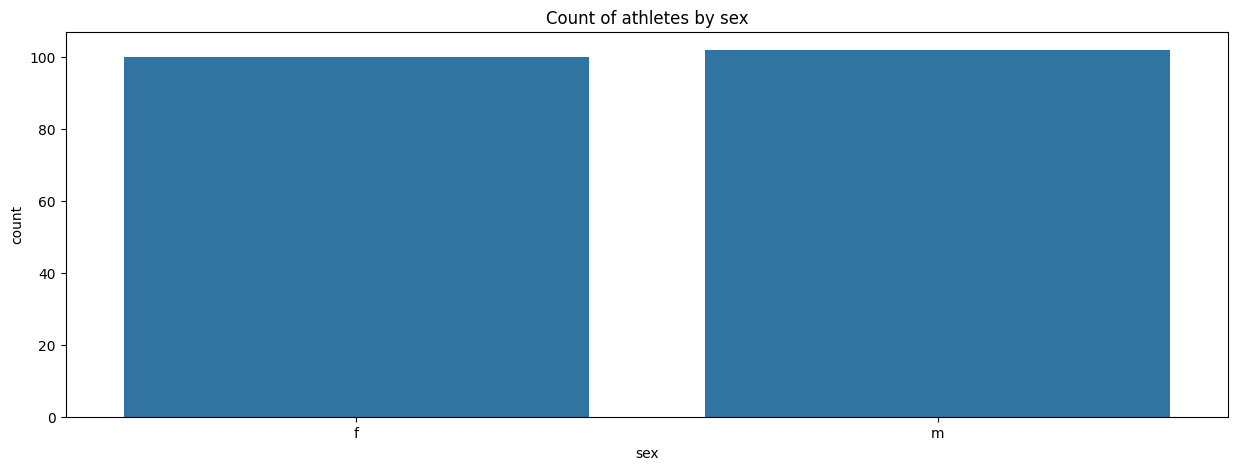

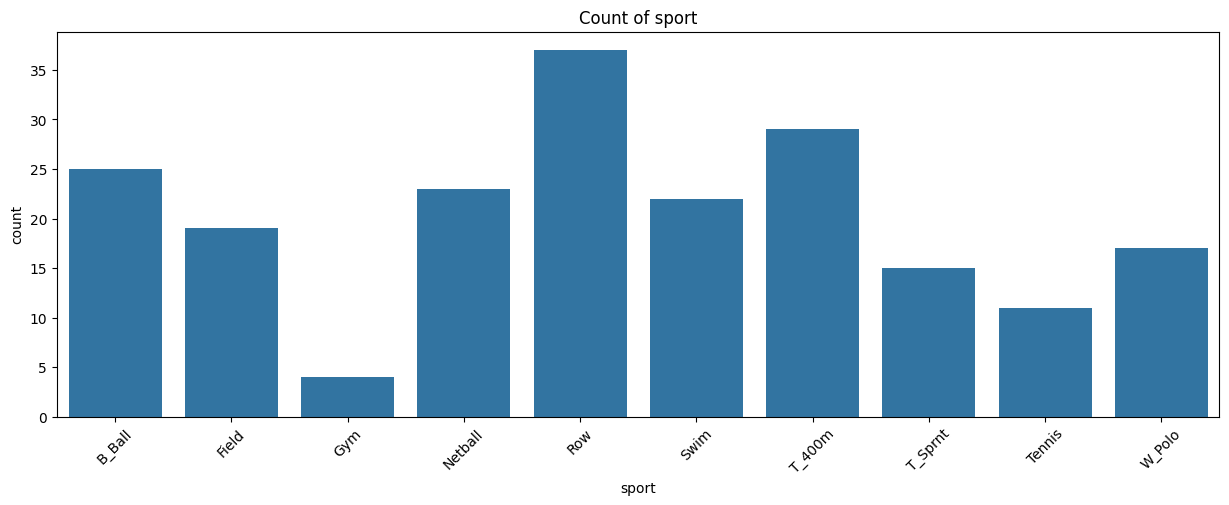

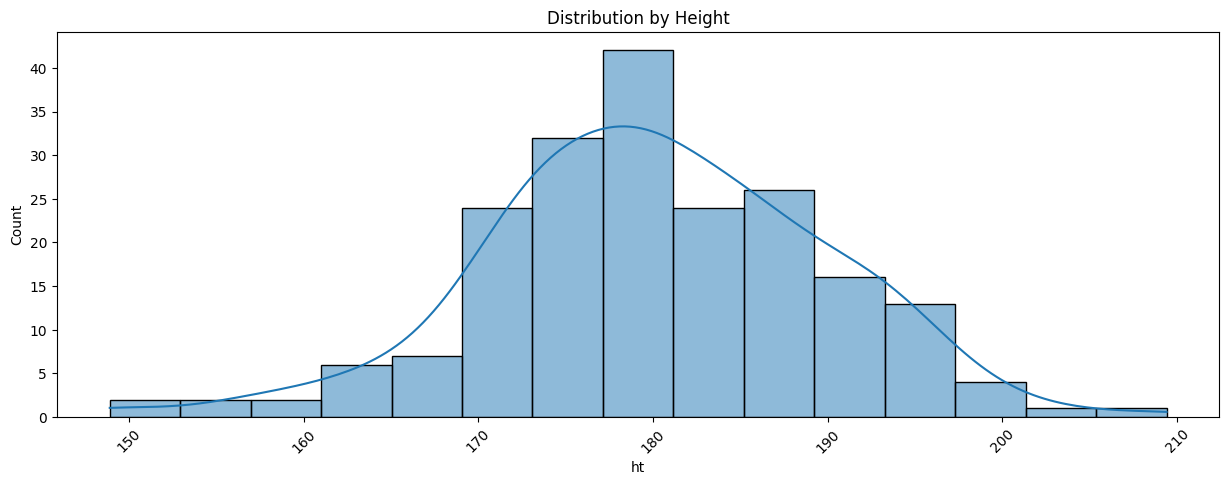

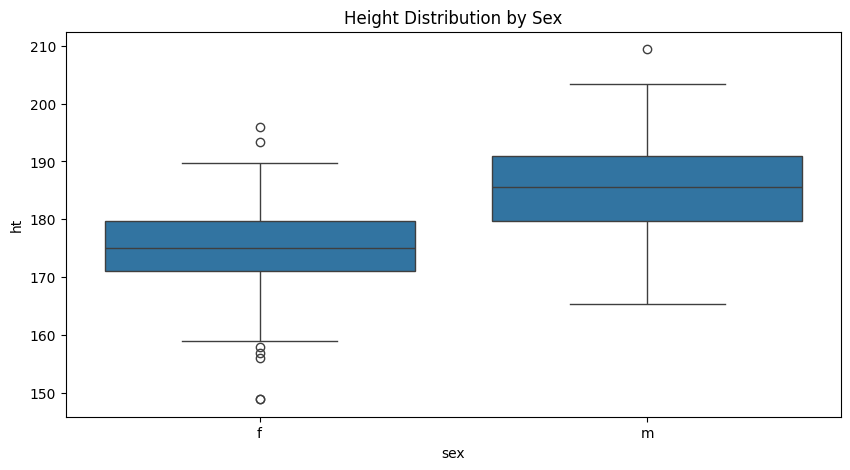

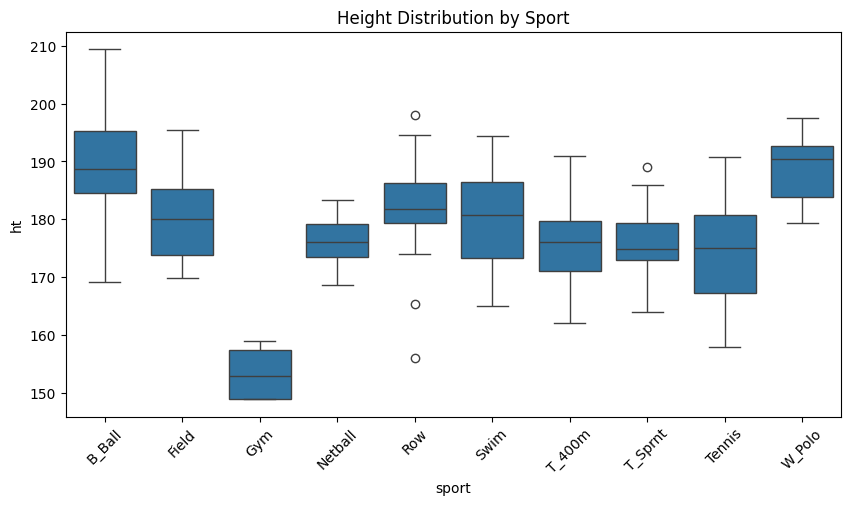

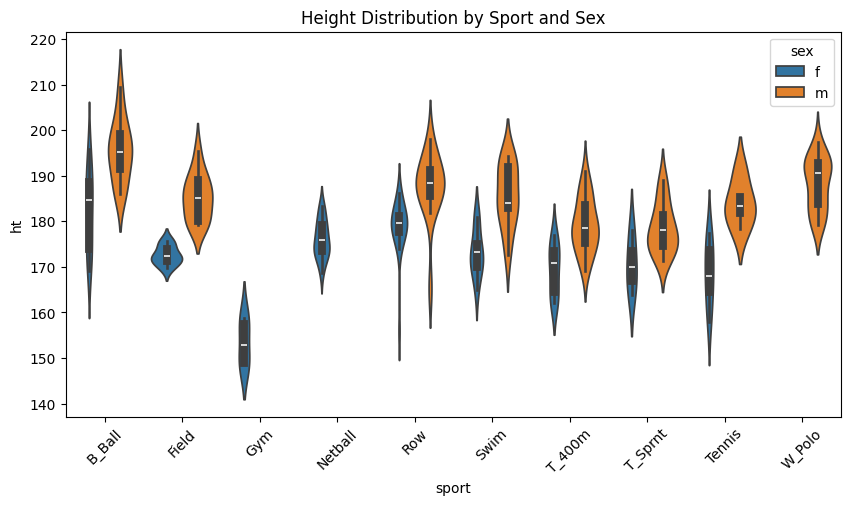

In [19]:
ais['sex'] = ais['sex'].astype('category')
ais['sport'] = ais['sport'].astype('category')
ais.info()

plt.figure(figsize=(15,5))
sns.countplot(data=ais, x='sex')
plt.title('Count of athletes by sex')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(data=ais, x='sport')
plt.title('Count of sport')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=ais, x='ht', kde=True)
plt.title('Distribution by Height')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=ais, x='sex', y='ht')
plt.title('Height Distribution by Sex')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=ais, x='sport', y='ht')
plt.title('Height Distribution by Sport')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=ais, x='sport', y='ht', hue='sex')
plt.title('Height Distribution by Sport and Sex')
plt.xticks(rotation=45)
plt.show()

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [35]:
# Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

# 1. the rowers
# 2. the rowers, netball and tennis players together
# 3. the female basketball players and rowers together

rowers = ais[ais['sport'] == 'Row']
print("Rowers:")
print(rowers['ht'].describe())
print("Most frequent sex:", rowers['sex'].mode()[0])

# 2. the rowers, netball and tennis players together
rowers_netball_tennis = ais[ais['sport'].isin(['Row', 'Netball', 'Tennis'])]
print("\nRowers, Netball and Tennis players:")
print(rowers_netball_tennis['ht'].describe())
print("Most frequent sex:", rowers['sex'].mode()[0])

# 3. the female basketball players and rowers together
f_basketball_rowers = ais[(ais['sport'] == 'Row') | (ais['sport'] == 'Basketball') & (ais['sex'] == 'F')]
print("\nFemale Basketball players and Rowers:")
print(f_basketball_rowers['ht'].describe())
print("Most frequent sex:", rowers['sex'].mode()[0])






Rowers:
count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64
Most frequent sex: f

Rowers, Netball and Tennis players:
count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64
Most frequent sex: f

Female Basketball players and Rowers:
count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64
Most frequent sex: f


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |